<a target="_blank" href="https://colab.research.google.com/github/huseyinegg/IE423-2024SUMMER/blob/main/M.HuseyinBeyribey_IE423_TASK4.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
dfBankData = pd.read_csv('data/bank-full.csv')
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Firstly Let's analyze the data a little bit

In [ ]:
dfBankData.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [ ]:
string_columns = dfBankData[dfBankData.columns.tolist()].select_dtypes(include='object').columns.tolist()
numerical_columns = [col for col in dfBankData.columns if dfBankData[col].dtype in ['int64', 'float64']]

print("String Columns: {string_columns}".format(string_columns=string_columns))
print("Numerical Columns: {numerical_columns}".format(numerical_columns=numerical_columns))

String Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


What is column y?

In [ ]:
dfBankData["y"]

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

Is there any missing value?

In [ ]:
dfBankData.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

After analyzing data a little bit, we can say:

<ul>
  <li>The data is preprocessed, doesn't include any missing value.</li>
  <li>The data includes non-numerical columns.</li>
  <li>The classification goal is to predict if the client will subscribe a term deposit (variable y).</li>
</ul>

In [ ]:
dfBankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
for feature in string_columns:
    print('The feature: {} number of categories: {}'.format(feature,len(dfBankData[feature].unique())))

The feature: job number of categories: 12
The feature: marital number of categories: 3
The feature: education number of categories: 4
The feature: default number of categories: 2
The feature: housing number of categories: 2
The feature: loan number of categories: 2
The feature: contact number of categories: 3
The feature: month number of categories: 12
The feature: poutcome number of categories: 4
The feature: y number of categories: 2


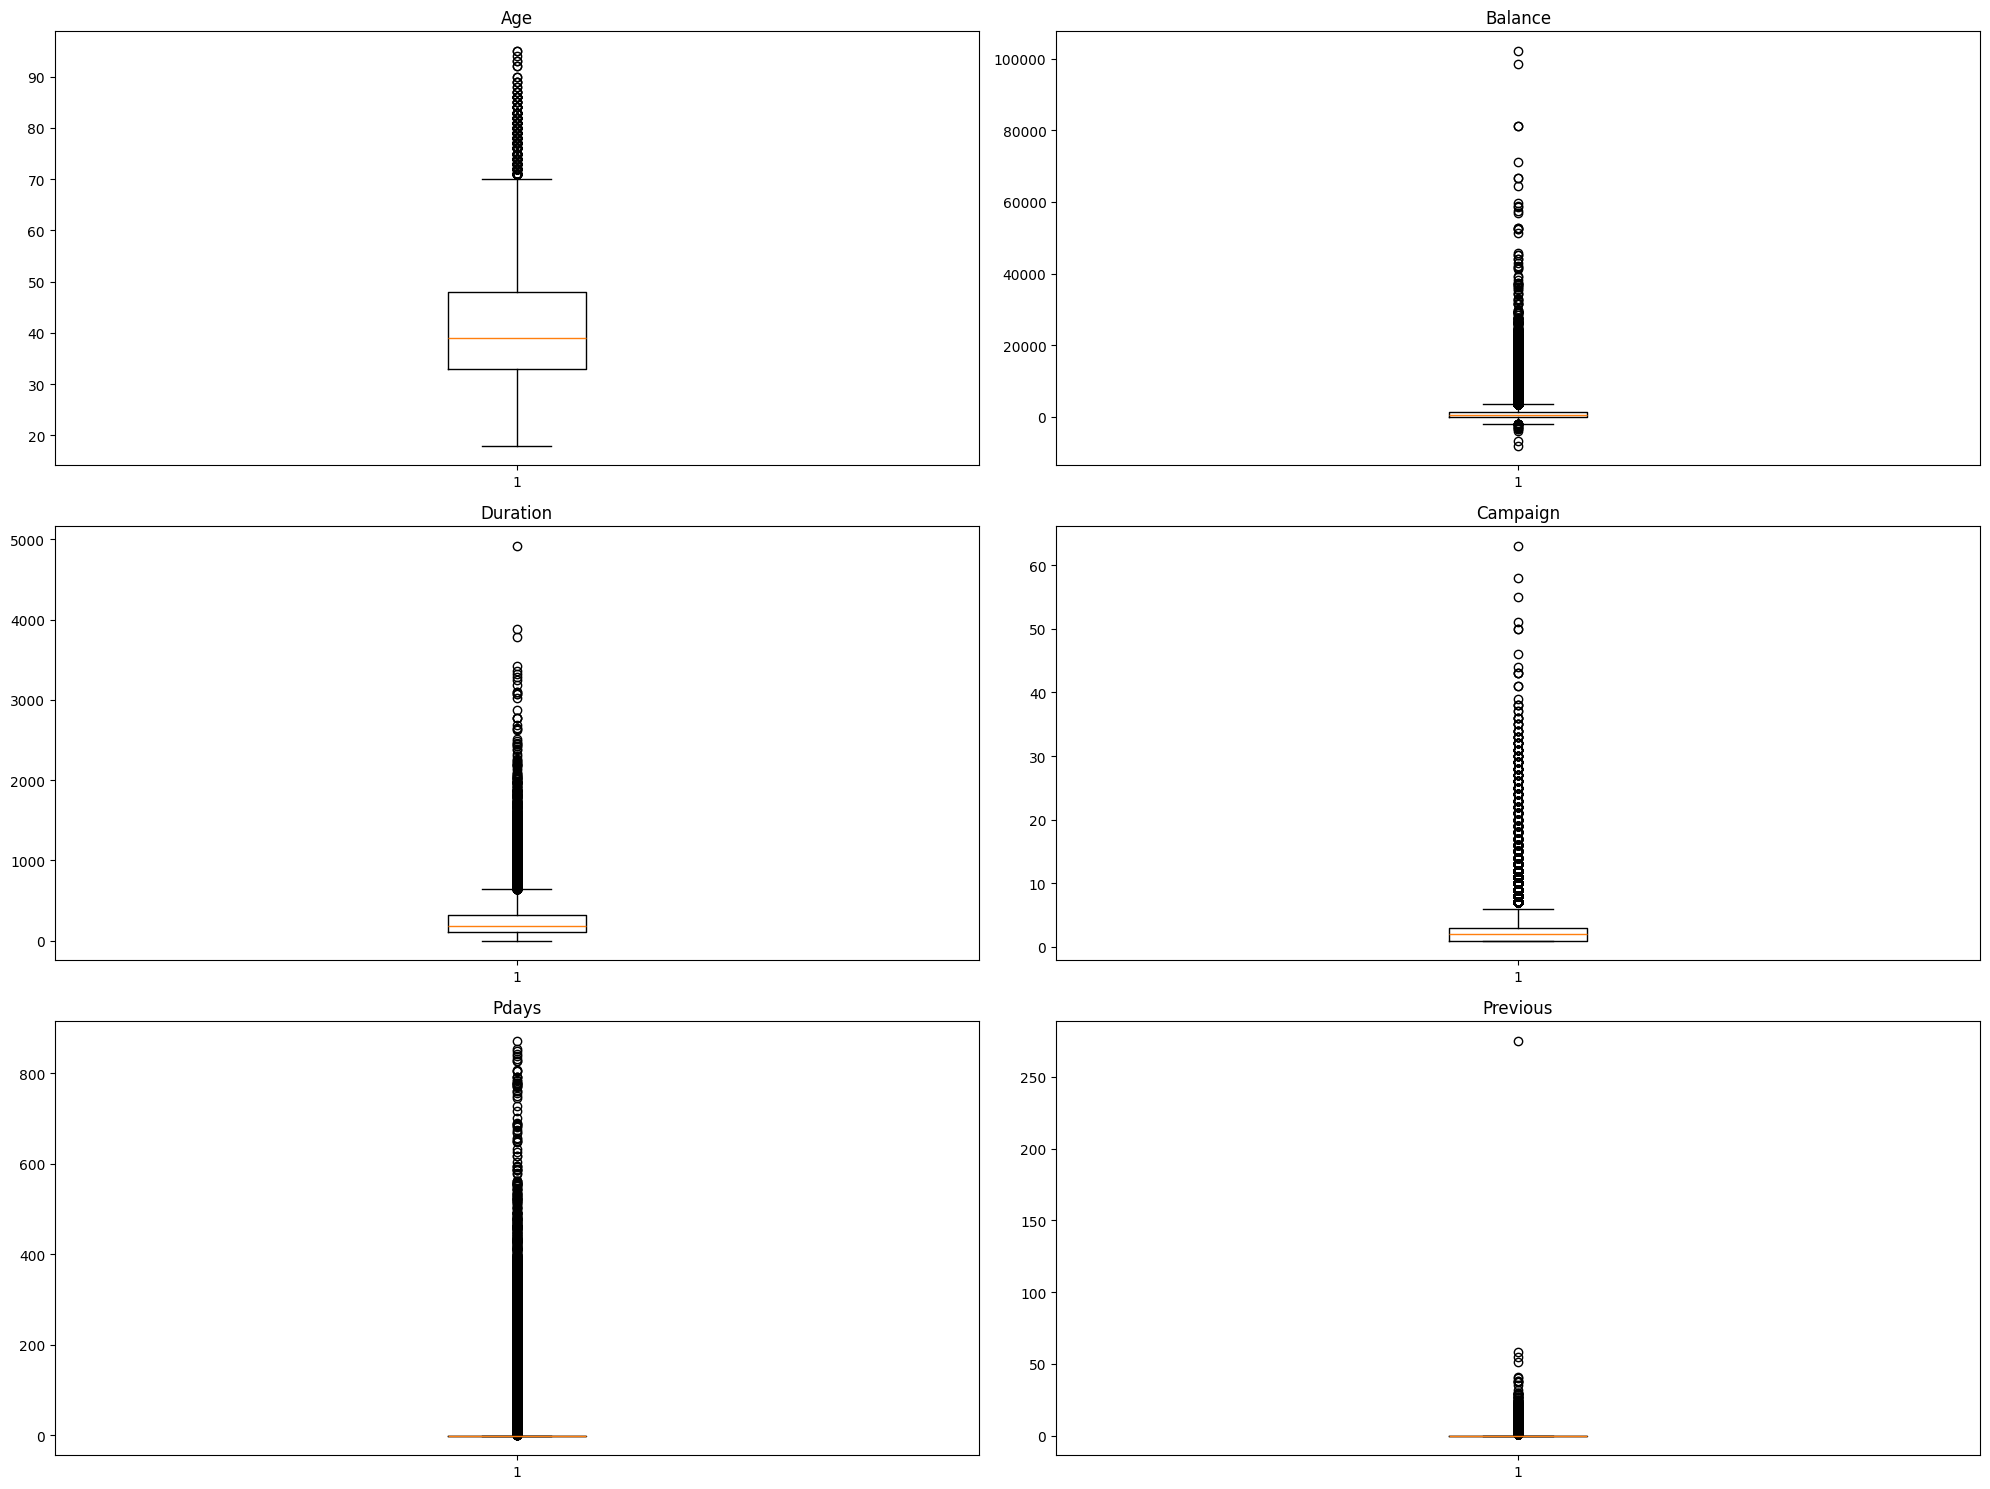

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
plt.boxplot(dfBankData['age'])
plt.title('Age')

plt.subplot(3, 2, 2)
plt.boxplot(dfBankData['balance'])
plt.title('Balance')

plt.subplot(3, 2, 3)
plt.boxplot(dfBankData['duration'])
plt.title('Duration')

plt.subplot(3, 2, 4)
plt.boxplot(dfBankData['campaign'])
plt.title('Campaign')

plt.subplot(3, 2, 5)
plt.boxplot(dfBankData['pdays'])
plt.title('Pdays')

plt.subplot(3, 2, 6)
plt.boxplot(dfBankData['previous'])
plt.title('Previous')

plt.tight_layout()
plt.show()

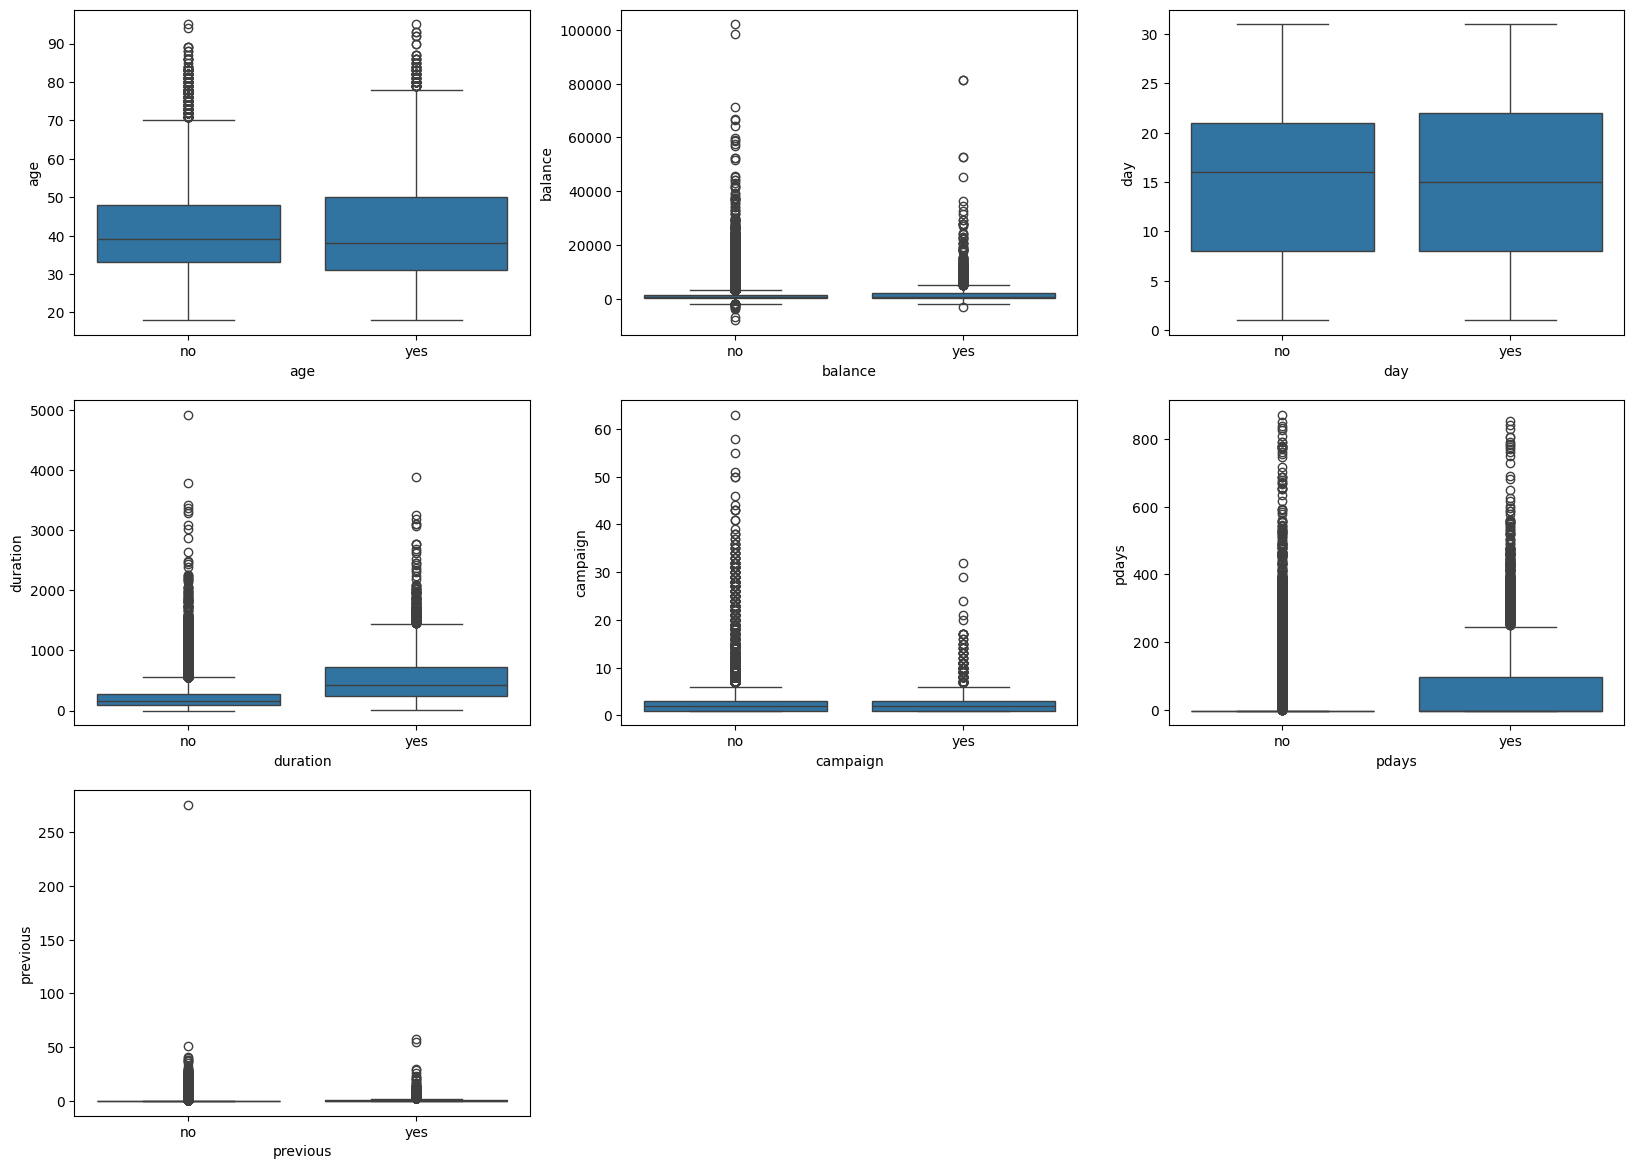

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numerical_columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= dfBankData[feature], data=dfBankData, ax=ax)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

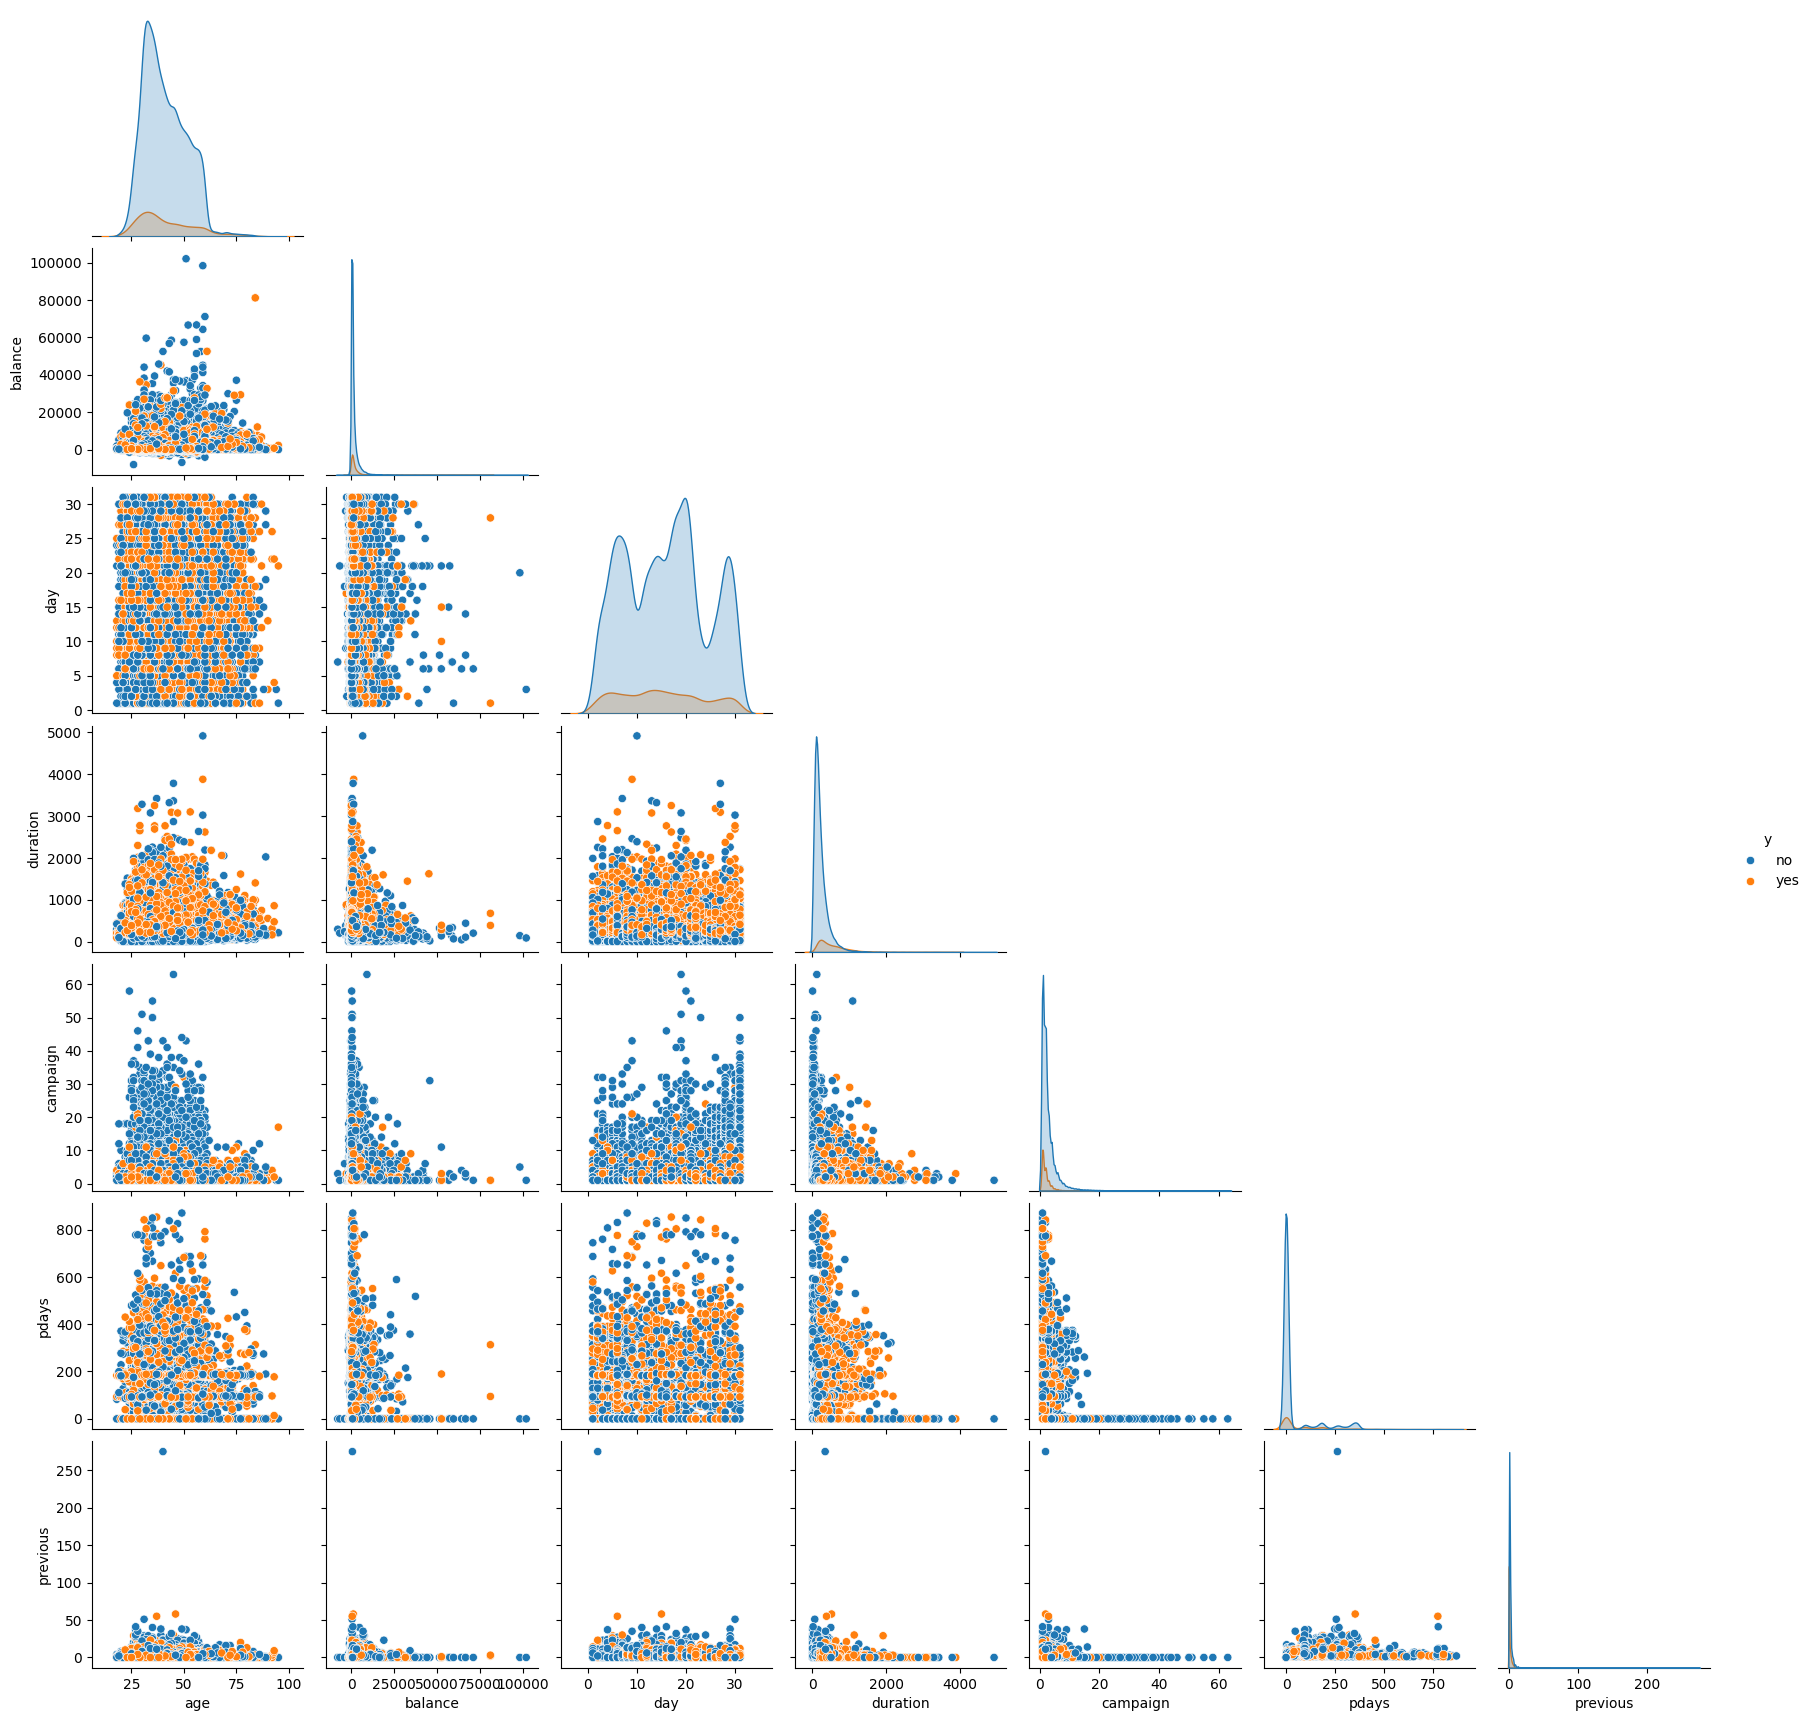

In [ ]:
sns.pairplot(dfBankData,hue='y',corner=True)

In [ ]:
# Identifying outliers in the data using IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Finding outliers for each numerical column
outliers_age = find_outliers_iqr(dfBankData, 'age')
outliers_balance = find_outliers_iqr(dfBankData, 'balance')
outliers_duration = find_outliers_iqr(dfBankData, 'duration')
outliers_campaign = find_outliers_iqr(dfBankData, 'campaign')
outliers_pdays = find_outliers_iqr(dfBankData, 'pdays')
outliers_previous = find_outliers_iqr(dfBankData, 'previous')

# Combining outliers into a single dataframe for display
outliers_combined = pd.concat([outliers_age, outliers_balance, outliers_duration, outliers_campaign,
                               outliers_pdays, outliers_previous]).drop_duplicates()

outliers_combined.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes


In [ ]:
dfBankData.shape

(45211, 17)

Now, I need to handle non-numerical data, therefore I will analyze non-numerical columns.

In [ ]:
for col in dfBankData.select_dtypes(include='object').columns:
    print(col)
    print(dfBankData[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [ ]:
dfBankData.duplicated().sum()

np.int64(0)

In [ ]:
dfBankData[numerical_columns].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

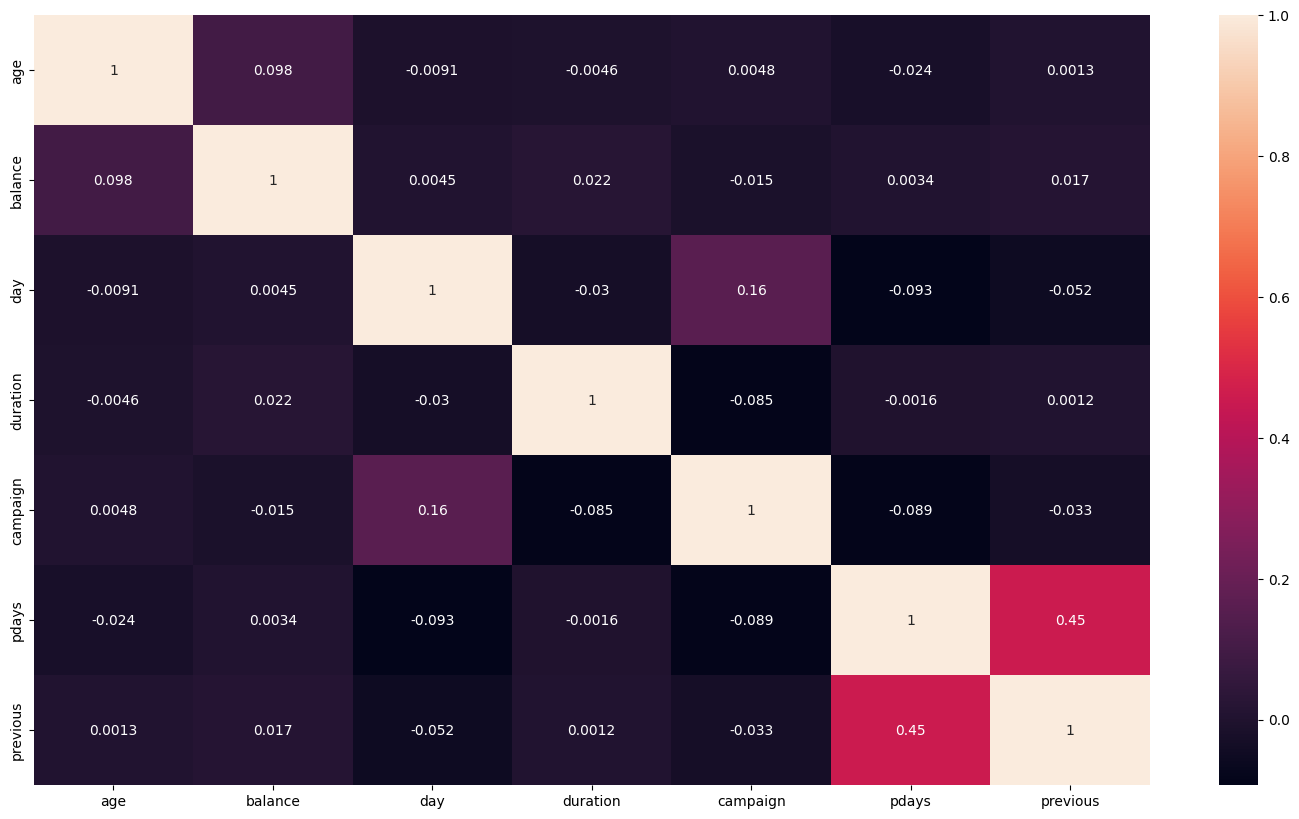

In [ ]:
fig = plt.figure(figsize=(18,10))
sns.heatmap(dfBankData[numerical_columns].corr(),annot=True)

# Labeling non-numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in string_columns:
    le = LabelEncoder()
    dfBankData[column] = le.fit_transform(dfBankData[column])
    label_encoders[column] = le

# Display the first few rows of the label encoded dataframe

dfBankData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [ ]:
for col in dfBankData.select_dtypes(include='object').columns:
    print(col)
    print(dfBankData[col].unique())

In [ ]:
for col in dfBankData.select_dtypes(include='int64').columns:
    print(col)
    print(dfBankData[col].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
[ 4  9  2  1 11  5  0  7  6 10  3  8]
marital
[1 2 0]
education
[2 1 3 0]
default
[0 1]
balance
[ 2143    29     2 ...  8205 14204 16353]
housing
[1 0]
loan
[0 1]
contact
[2 0 1]
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month
[ 8  6  5  1 10  9  2  4  3  7  0 11]
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
pdays
[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 12

In [ ]:
corr_matt_withy = dfBankData.corr()['y']
print(corr_matt_withy)

age          0.025155
job          0.040438
marital      0.045588
education    0.066241
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact     -0.148395
day         -0.028348
month       -0.024471
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome    -0.077840
y            1.000000
Name: y, dtype: float64


 # Classification

## Logistic Regression

To apply logistic regression to classify data with scikit-learn, we need to determine if the case is binary or multinomial and then choose an appropriate solver.


y has two unique values therefore I will use binary classification. Also its shape (45211, 17) may be considered relatively large, documentation of sklearn says, for large datasets solver `saga` may be preferred I will try both, default solver `lbfs` and `saga`


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.utils.class_weight import compute_class_weight

def logistic_regression_which_to_use(data_frame, target, return_confusion_matrix=False):

    X = scale(data_frame.drop([target], axis=1))
    y = data_frame[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

    unique_values = data_frame[target].unique()
    num_classes = len(unique_values)


    if num_classes == 2:
        case_type = 'binary'
    else:
        case_type = 'multinomial'

    if case_type == 'binary':
        multi_class_param = 'ovr'
    else:
        multi_class_param = 'multinomial'

    if data_frame.shape[0] > 1000000:
        solver = 'saga'
    else:
        solver = 'lbfgs'

    model = LogisticRegression(solver=solver, multi_class=multi_class_param, max_iter=10000, random_state=1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    if return_confusion_matrix == False:
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred))
        print("\n\tCase_Type: {case_type} \n\t\n solver {solver} \n\t\n accuracy {accuracy} \n\t\n report {report}".format(case_type=case_type, solver= solver, accuracy=accuracy, report=report))
        print ('AUC Score (Logistic Regression):')
        print (roc_auc_score(y_test, y_pred))
    else:
        return confusion_matrix(y_test, y_pred)


logistic_regression_which_to_use(dfBankData, 'y')

Confusion Matrix:
[[7837  156]
 [ 830  220]]

	Case_Type: binary 
	
 solver lbfgs 
	
 accuracy 0.8909653875926131 
	
 report               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.59      0.21      0.31      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.62      9043
weighted avg       0.87      0.89      0.87      9043

AUC Score (Logistic Regression):
0.5950033660405235


/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Let's calculate accuracy with hand by confusion matrix and verify the result.

In [ ]:
def calculate_metrics_from_confusion_matrix(confusion_matrix):
    """
    Calculate accuracy, precision, recall, and F1 score from a confusion matrix.

    Parameters:
    confusion_matrix (numpy.ndarray): Confusion matrix of shape (2, 2)

    Returns:
    dict: Dictionary containing accuracy, precision, recall, and F1 score
    """
    if not isinstance(confusion_matrix, np.ndarray) or confusion_matrix.shape != (2, 2):
        raise ValueError("Confusion matrix must be a numpy array of shape (2, 2)")

    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]

    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0

    # Recall
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # F1 Score
    f1_score = 2 * TP / (2 * TP + FP + FN) if (2 * TP + FP + FN) != 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score

    }

metrics = calculate_metrics_from_confusion_matrix(logistic_regression_which_to_use(dfBankData, 'y', return_confusion_matrix=True))
metrics


/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


{'accuracy': np.float64(0.8909653875926131),
 'precision': np.float64(0.5851063829787234),
 'recall': np.float64(0.20952380952380953),
 'f1_score': np.float64(0.3085553997194951)}

Also we have AUC Score (Logistic Regression): 0.5950033660405235 which is not good enough.

I will check some possible causes for low AUC value

In [ ]:
#Check Class Balance
class_counts = dfBankData['y'].value_counts()
print(class_counts)

y
0    39922
1     5289
Name: count, dtype: int64


Class y is inbalanced, maybe it can cause this problem, I will try some methods to try to fix it.

#### Oversampling the minority class using SMOTE

Oversampling methods: https://imbalanced-learn.org/stable/references/over_sampling.html

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = scale(dfBankData.drop(["y"], axis=1))
y = dfBankData['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the logistic regression model with resampled data
model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=10000)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(report)
print(roc_auc)

/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.81      0.88     11966
           1       0.36      0.80      0.50      1598

    accuracy                           0.81     13564
   macro avg       0.66      0.80      0.69     13564
weighted avg       0.90      0.81      0.84     13564

0.8755339230866263


now, we lost precision but our roc_auc score increased to 0.8755342368667839. Oversampling can cause this problem according to documentation.

To solve this problem I will try Threshold Tuning: https://scikit-learn.org/stable/modules/classification_threshold.html ,  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Avoid division by zero by filtering out cases where both precision and recall are zero
valid_indices = (precisions[:-1] + recalls[:-1]) != 0  # Exclude the last precision and recall for matching size with thresholds
valid_precisions = precisions[:-1][valid_indices]
valid_recalls = recalls[:-1][valid_indices]
valid_thresholds = thresholds[valid_indices]

# Calculate F1 scores for valid cases
f1_scores = 2 * (valid_precisions * valid_recalls) / (valid_precisions + valid_recalls)

# Find the threshold that balances precision and recall
best_threshold = valid_thresholds[np.argmax(f1_scores)]

# Apply the best threshold to predictions
y_pred_adjusted = (y_pred_prob >= best_threshold).astype(int)

# Evaluate the model with the adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)
roc_auc = roc_auc_score(y_test, y_pred_prob)



print(report)
print(roc_auc)


              precision    recall  f1-score   support

           0       0.95      0.89      0.92     11966
           1       0.45      0.65      0.53      1598

    accuracy                           0.86     13564
   macro avg       0.70      0.77      0.72     13564
weighted avg       0.89      0.86      0.87     13564

0.8755339230866263


it is the best result I am attained till now but precision and f_1 score still is not enough therefore I will try different methods now.

### UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


# Applying undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train the logistic regression model with undersampled data
model = LogisticRegression(random_state=1)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(report)
print(roc_auc)


              precision    recall  f1-score   support

           0       0.97      0.82      0.89     11966
           1       0.37      0.80      0.50      1598

    accuracy                           0.81     13564
   macro avg       0.67      0.81      0.69     13564
weighted avg       0.90      0.81      0.84     13564

0.8767840755314861


Nah, it is worse :( I will try to combine oversampling and undersampling using SMOTEENN. According to documentation: SMOTEENN combines SMOTE and Edited Nearest Neighbors (ENN), which first oversamples the minority class and then removes instances that are difficult to classify (noise) using ENN.

https://imbalanced-learn.org/stable/combine.html#combine

In [ ]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=1, max_iter=10000)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

metrics = calculate_metrics_from_confusion_matrix(cm)
metrics['roc_auc'] = roc_auc


print(report)
print(roc_auc)

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     11966
           1       0.32      0.86      0.46      1598

    accuracy                           0.77     13564
   macro avg       0.65      0.81      0.66     13564
weighted avg       0.90      0.77      0.80     13564

0.8774302011728263


Precision is still not enough. But according to documentation Ensemble Method Classifiers can work better with unbalanced datasets. Therefore I will use https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

metrics = calculate_metrics_from_confusion_matrix(cm)
metrics['roc_auc'] = roc_auc

print(report)
print(roc_auc)

/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed

              precision    recall  f1-score   support

           0       0.98      0.82      0.90     11966
           1       0.40      0.88      0.55      1598

    accuracy                           0.83     13564
   macro avg       0.69      0.85      0.72     13564
weighted avg       0.91      0.83      0.86     13564

0.9215502015828327


it is way better. Nice!

In [ ]:
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


## Naive Bayes Classifier

First let's test the independence of dataset by chi_squared test

In [ ]:
import scipy.stats as stats

dfBankData_copy_withoutlabeling = pd.read_csv("data/bank-full.csv")
categorical_columns = dfBankData_copy_withoutlabeling.select_dtypes(include=['object']).columns

p_values_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(dfBankData_copy_withoutlabeling[col1], dfBankData_copy_withoutlabeling[col2])
            _, p_value, _, _ = stats.chi2_contingency(contingency_table)
            p_values_matrix.at[col1, col2] = p_value
        else:
            p_values_matrix.at[col1, col2] = 1.0

p_values_matrix

,job,marital,education,default,housing,loan,contact,month,poutcome,y
job,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marital,0.0,1.0,0.0,0.000234,0.000063,0.0,0.0,0.0,0.0,0.0
education,0.0,0.0,1.0,0.009638,0.0,0.0,0.0,0.0,0.0,0.0
default,0.0,0.000234,0.009638,1.0,0.212925,0.0,0.000001,0.0,0.0,0.000002
housing,0.0,0.000063,0.0,0.212925,1.0,0.0,0.0,0.0,0.0,0.0
loan,0.0,0.0,0.0,0.0,0.0,1.0,0.002512,0.0,0.0,0.0
contact,0.0,0.0,0.0,0.000001,0.0,0.002512,1.0,0.0,0.0,0.0
month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
poutcome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
y,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,1.0


It is not a perfect test, but generally we can say the data is independent. Therefore, we can wait a good Naive Bayes Classifier result.

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(report)
print(roc_auc)


              precision    recall  f1-score   support

           0       0.93      0.88      0.90     11966
           1       0.34      0.47      0.39      1598

    accuracy                           0.83     13564
   macro avg       0.63      0.67      0.65     13564
weighted avg       0.86      0.83      0.84     13564

0.8109979736077417


## K-Nearest Neighbor (KNN)

Data is not balanced. Therefore we had problems with Logistic Regression. I wait same problems with KNN due to same causes.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(report)
print(roc_auc)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.64      0.23      0.34      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564

0.8473526211207097


what would better k value be? I will use Hyperparameter Tuning with Grid Search to find optimized k value

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 20]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=stratified_kfold, scoring='precision')

grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
best_params = grid_search.best_params_
best_precision = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Precision: {best_precision}")


Best Parameters: {'n_neighbors': 3}
Best Precision: 0.9825287289247713


do it with optimized values.

In [ ]:
k = 3  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(report)
print(roc_auc)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11966
           1       0.55      0.35      0.43      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.66      0.68     13564
weighted avg       0.87      0.89      0.88     13564

0.7754495057648737


It is worse I don't know why.

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

mdlSvmHrt = SVC()
mdlSvmHrt.fit(X_train, y_train)
y_test_pred = mdlSvmHrt.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.27      0.38      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564

AUC Score:
0.6255583979389246


I will play with it.

Without SMOTE

In [ ]:
import warnings
warnings.filterwarnings('always')

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=stratified_kfold, scoring='precision')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_precision = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Precision: {best_precision}")

model_wtihout_smote = SVC(probability=True)
model_wtihout_smote.fit(X_train, y_train)

y_pred = model_wtihout_smote.predict(X_test)
y_pred_prob = model_wtihout_smote.predict_proba(X_test)[:, 1]


report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n\n\n\n")

print(report)
print(roc_auc)

/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Precision: 0.7248119166453211





              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.27      0.38      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564

0.8539776446280732


with best_paremeters : Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
best_params = {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

model_withbest = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], probability=True)
model_withbest.fit(X_train, y_train)

y_pred = model_withbest.predict(X_test)
y_pred_prob = model_withbest.predict_proba(X_test)[:, 1]


report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


print(report)
print(roc_auc)

y_train_pred_prob = model_withbest.predict_proba(X_train)[:, 1]
y_train_pred = model_withbest.predict(X_train)

train_report = classification_report(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)
print("\n\n\n\n")

print(train_report)
print(train_roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.68      0.15      0.24      1598

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564

0.839093587442267





              precision    recall  f1-score   support

           0       0.90      0.99      0.94     27956
           1       0.74      0.17      0.27      3691

    accuracy                           0.90     31647
   macro avg       0.82      0.58      0.61     31647
weighted avg       0.88      0.90      0.87     31647

0.8727758475126702


with smote

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

best_params = {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

model_Withsmote = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], probability=True)
model_Withsmote.fit(X_train_resampled, y_train_resampled)

y_pred = model_Withsmote.predict(X_test)
y_pred_prob = model_Withsmote.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


print(report)
print(roc_auc)

y_train_pred_prob = model_Withsmote.predict_proba(X_train)[:, 1]
y_train_pred = model_Withsmote.predict(X_train)

train_report = classification_report(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)
print("\n\n\n\n")

print(train_report)
print(train_roc_auc)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     11966
           1       0.38      0.80      0.51      1598

    accuracy                           0.82     13564
   macro avg       0.67      0.81      0.70     13564
weighted avg       0.90      0.82      0.85     13564

0.8921764565727215





              precision    recall  f1-score   support

           0       0.99      0.66      0.79     27956
           1       0.27      0.95      0.42      3691

    accuracy                           0.69     31647
   macro avg       0.63      0.80      0.60     31647
weighted avg       0.91      0.69      0.75     31647

0.8883012508838928


Model with smote but without best parameters.

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

best_params = {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

model_Withsmote_wtihoutbest = SVC(probability=True)
model_Withsmote_wtihoutbest.fit(X_train_resampled, y_train_resampled)

y_pred = model_Withsmote_wtihoutbest.predict(X_test)
y_pred_prob = model_Withsmote_wtihoutbest.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


print(report)
print(roc_auc)

y_train_pred_prob = model_Withsmote_wtihoutbest.predict_proba(X_train)[:, 1]
y_train_pred = model_Withsmote_wtihoutbest.predict(X_train)

train_report = classification_report(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)
print("\n\n\n\n")

print(train_report)
print(train_roc_auc)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11966
           1       0.51      0.56      0.53      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.74      0.73     13564
weighted avg       0.89      0.89      0.89     13564

0.8908410605183607





              precision    recall  f1-score   support

           0       0.99      0.65      0.78     27956
           1       0.26      0.96      0.41      3691

    accuracy                           0.68     31647
   macro avg       0.63      0.80      0.60     31647
weighted avg       0.91      0.68      0.74     31647

0.898530595297429


Testing in both test and train samples there are no overfitting. Best test in testing data auc value is 0.8921764565727215. Which is pretty good but still, we have lost precision.

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc}")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11966
           1       0.67      0.08      0.14      1598

    accuracy                           0.89     13564
   macro avg       0.78      0.54      0.54     13564
weighted avg       0.86      0.89      0.85     13564

ROC AUC Score: 0.906590000412098


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc}")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11966
           1       0.73      0.08      0.14      1598

    accuracy                           0.89     13564
   macro avg       0.81      0.54      0.54     13564
weighted avg       0.87      0.89      0.85     13564

ROC AUC Score: 0.8595423526859687


## XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc}")


/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [08:09:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.62      0.15      0.23      1598

    accuracy                           0.89     13564
   macro avg       0.76      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

ROC AUC Score: 0.833317365409754


## LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

X = dfBankData.drop(columns=['y'])
y = dfBankData['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc}")

[LightGBM] [Info] Number of positive: 3691, number of negative: 27956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 31647, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     11966
           1       0.45      0.87      0.59      1598

    accuracy                           0.86     13564
   macro avg       0.72      0.86      0.75     13564
weighted avg       0.92      0.86      0.88     13564

ROC AUC Score: 0.933302732795068


Unlike level-wise growth used by other tree algorithms, LightGBM grows trees leaf-wise (best-first). https://lightgbm.readthedocs.io/en/stable/pythonapi/lightgbm.LGBMClassifier.html, which often leads to better accuracy but can result in deeper trees.

Also I said, this data set is pretty big and LightGBM works better with large datasets, also according to documentation LightGBM can handle categorical features natively.

Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

X = dfBankData.drop(columns=['y'])
y = dfBankData['y']

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    cv_results.append({'report': report, 'roc_auc': roc_auc})

avg_roc_auc = np.mean([result['roc_auc'] for result in cv_results])
print(f"Average ROC AUC Score: {avg_roc_auc}")

print("Sample Classification Report:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 4231, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 4232, number of negative: 31937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 36169, number of used features: 16
[LightGBM] [Info] [binar

## Neural Networks

In [ ]:
dfBankData.shape

(45211, 17)

Data is adequate for training Neural Network.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

dfBankData = pd.read_csv("bank_data.csv")


string_columns = dfBankData[dfBankData.columns.tolist()].select_dtypes(include='object').columns.tolist()
numerical_columns = [col for col in dfBankData.columns if dfBankData[col].dtype in ['int64', 'float64']]
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in string_columns:
    le = LabelEncoder()
    dfBankData[column] = le.fit_transform(dfBankData[column])
    label_encoders[column] = le

X = dfBankData.drop(columns=['y']).values
y = dfBankData['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNetwork().to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
model.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor.to(device)).cpu().numpy()
    y_test_pred_class = (y_test_pred > 0.5).astype(int)

report = classification_report(y_test, y_test_pred_class)
roc_auc = roc_auc_score(y_test, y_test_pred)

output_text = (
    "Final Model Classification Report:\n" + report + "\n" +
    f"Final Model ROC AUC Score: {roc_auc:.4f}"
)

print(output_text)

with open("model_evaluation_torch.txt", "w") as file:
    file.write(output_text)

I will use my GPU to train model.

**Output**

Epoch [10/50], Loss: 0.2262 <br />
Epoch [20/50], Loss: 0.0154 <br />
Epoch [30/50], Loss: 0.1306 <br />
Epoch [40/50], Loss: 0.1145 <br />
Epoch [50/50], Loss: 0.2242 <br />

```
Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11966
           1       0.59      0.44      0.50      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.70      0.72     13564
weighted avg       0.89      0.90      0.89     13564
```


```
Final Model ROC AUC Score: 0.9016
```





### Hyperparameter Tuning ?

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import optuna

dfBankData = pd.read_csv("bank_data.csv")


string_columns = dfBankData[dfBankData.columns.tolist()].select_dtypes(include='object').columns.tolist()
numerical_columns = [col for col in dfBankData.columns if dfBankData[col].dtype in ['int64', 'float64']]
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in string_columns:
    le = LabelEncoder()
    dfBankData[column] = le.fit_transform(dfBankData[column])
    label_encoders[column] = le

X = dfBankData.drop(columns=['y']).values
y = dfBankData['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Neural Network with Dropout and Batch Normalization
class DropoutBatchTunedNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, dropout_rate):
        super(DropoutBatchTunedNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Objective function for Optuna
def objective(trial):
    input_dim = X_train.shape[1]
    hidden_dim1 = trial.suggest_int('hidden_dim1', 64, 256)
    hidden_dim2 = trial.suggest_int('hidden_dim2', 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2)

    model = DropoutBatchTunedNeuralNetwork(input_dim, hidden_dim1, hidden_dim2, dropout_rate).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

    num_epochs = 50
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor.to(device)).cpu().numpy()
        y_test_pred_class = (y_test_pred > 0.5).astype(int)

    roc_auc = roc_auc_score(y_test, y_test_pred)
    return roc_auc

# Optimize hyperparameters using Optuna
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

# Train the best model
best_model = DropoutBatchTunedNeuralNetwork(X_train.shape[1], best_params['hidden_dim1'], best_params['hidden_dim2'], best_params['dropout_rate']).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(best_model.parameters(), lr=best_params['learning_rate'])

num_epochs = 50
best_model.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

best_model.eval()
with torch.no_grad():
    y_test_pred = best_model(X_test_tensor.to(device)).cpu().numpy()
    y_test_pred_class = (y_test_pred > 0.5).astype(int)

report = classification_report(y_test, y_test_pred_class)
roc_auc = roc_auc_score(y_test, y_test_pred)



output_text = (
    "Final Model Classification Report:\n" + report + "\n" +
    f"Final Model ROC AUC Score: {roc_auc:.4f}"
)

print(output_text)

with open("model_evaluation_tuned.txt", "w") as file:
    file.write(output_text)

**Output**

Final Model Classification Report:


```
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.62      0.40      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564
```


```
Final Model ROC AUC Score: 0.9137
```

Even with my RTX 4090 it took a lot of time but we attained the best model we have attained with high enough precision and 91% ROC AUC Score.

Why did BalancedRandomForestClassifier worked better? Becuase it draws a bootstrap sample from the minority class and sample with replacement the same number of samples from the majority class. https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html. Therefore now I will modify my code to sample the minority class with replacement and then sample the same number of samples from the majority class. Will it work better? To do that I will write another function `balance_data(X, y)`



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Load and preprocess data
dfBankData = pd.read_csv("bank_data.csv")

string_columns = dfBankData.select_dtypes(include='object').columns.tolist()
numerical_columns = [col for col in dfBankData.columns if dfBankData[col].dtype in ['int64', 'float64']]
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in string_columns:
    le = LabelEncoder()
    dfBankData[column] = le.fit_transform(dfBankData[column])
    label_encoders[column] = le

X = dfBankData.drop(columns=['y']).values
y = dfBankData['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Balance the training data
def balance_data(X, y):
    # Separate majority and minority classes
    X_majority = X[y == 0]
    y_majority = y[y == 0]
    X_minority = X[y == 1]
    y_minority = y[y == 1]

    # Resample minority class with replacement
    minority_indices = np.random.choice(len(X_minority), size=len(X_majority), replace=True)
    X_minority_resampled = X_minority[minority_indices]
    y_minority_resampled = y_minority[minority_indices]

    # Combine majority class with resampled minority class
    X_balanced = np.vstack((X_majority, X_minority_resampled))
    y_balanced = np.hstack((y_majority, y_minority_resampled))

    return X_balanced, y_balanced


X_train_balanced, y_train_balanced = balance_data(X_train, y_train)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNetwork().to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
model.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor.to(device)).cpu().numpy()
    y_test_pred_class = (y_test_pred > 0.5).astype(int)

report = classification_report(y_test, y_test_pred_class)
roc_auc = roc_auc_score(y_test, y_test_pred)

output_text = (
        "Final Model Classification Report:\n" + report + "\n" +
        f"Final Model ROC AUC Score: {roc_auc:.4f}"
)

print(output_text)

with open("model_evaluation_torch_balanced.txt", "w") as file:
    file.write(output_text)


**Output**

Final Model Classification Report:


```
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     11966
           1       0.41      0.70      0.52      1598

    accuracy                           0.85     13564
   macro avg       0.68      0.78      0.71     13564
weighted avg       0.89      0.85      0.86     13564
```

```
Final Model ROC AUC Score: 0.8804
```



Now I will use A learning rate scheduler `ReduceLROnPlateau` to adjust the learning rate based on the validation loss, which helps stabilize training.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Load and preprocess data
dfBankData = pd.read_csv("bank_data.csv")

string_columns = dfBankData.select_dtypes(include='object').columns.tolist()
numerical_columns = [col for col in dfBankData.columns if dfBankData[col].dtype in ['int64', 'float64']]
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in string_columns:
    le = LabelEncoder()
    dfBankData[column] = le.fit_transform(dfBankData[column])
    label_encoders[column] = le

X = dfBankData.drop(columns=['y']).values
y = dfBankData['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Balance the training data
def balance_data(X, y):
    # Separate majority and minority classes
    X_majority = X[y == 0]
    y_majority = y[y == 0]
    X_minority = X[y == 1]
    y_minority = y[y == 1]

    # Resample minority class with replacement
    minority_indices = np.random.choice(len(X_minority), size=len(X_majority), replace=True)
    X_minority_resampled = X_minority[minority_indices]
    y_minority_resampled = y_minority[minority_indices]

    # Combine majority class with resampled minority class
    X_balanced = np.vstack((X_majority, X_minority_resampled))
    y_balanced = np.hstack((y_majority, y_minority_resampled))

    return X_balanced, y_balanced

X_train_balanced, y_train_balanced = balance_data(X_train, y_train)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNetwork().to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training the model
num_epochs = 50
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(test_loader)
    scheduler.step(avg_val_loss)

    model.train()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

# Evaluating the model
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor.to(device)).cpu().numpy()
    y_test_pred_class = (y_test_pred > 0.5).astype(int)

report = classification_report(y_test, y_test_pred_class)
roc_auc = roc_auc_score(y_test, y_test_pred)

output_text = (
    "Final Model Classification Report:\n" + report + "\n" +
    f"Final Model ROC AUC Score: {roc_auc:.4f}"
)

print(output_text)

with open("model_evaluation_torch_balanced_adjusted_learning_Rate.txt", "w") as file:
    file.write(output_text)


Final Model Classification Report:



```
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     11966
           1       0.42      0.78      0.55      1598

    accuracy                           0.85     13564
   macro avg       0.70      0.82      0.73     13564
weighted avg       0.90      0.85      0.87     13564
```

```
Final Model ROC AUC Score: 0.8912
```



These are have better precision than `BalancedRandomForestClassifier`, but worse than normal NeuralNetworks, maybe it is because I have scaled down dataset too much while trying to resampling in Last Both code, or maybe I have understood wrongly why `BalancedRandomForestClassifier` works better.